<div class="alert alert-block alert-success">
    
# FIT5196 Task 1 in Assessment 1
#### Student Name: Anon Pipatpakin
#### Student ID: 33366829

Date: 26/3/2023


Environment: Python 3.9.13

Libraries used:
* re (for regular expression, installed and imported) 
* pandas (for data manipulation) 
    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Patent Files](#examine) <br>
[4. Loading and Parsing Files](#load) <br>
$\;\;\;\;$[4.1. Defining Regular Expressions](#Reg_Exp) <br>
$\;\;\;\;$[4.2. Reading Files](#Read) <br>
$\;\;\;\;$[4.3. Whatever else](#latin) <br>
[5. Writing to CSV/JSON File](#write) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

-------------------------------------

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

This assignment requires extracting data from text file that has been formatted in XML. There is one text file consisting of a total of 150 US patents information. In each patent, we are interested to extract nine features from each patent which include grant_id, patent_title, kind, number_of_claims, inventors, citation_applicat_count, citations_examiner_count, claim_text, and abstract.

-------------------------------------

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

The only permitted packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:

* **re:** to define and use regular expressions
* **pandas:** use to create data frame and create CSV file

In [1]:
import re
import pandas as pd

-------------------------------------

<div class="alert alert-block alert-warning">

## 3.  Examining Patent Content <a class="anchor" name="examine"></a>

 </div>

First, try to understand the content in the text file, by using XML format tool. Then in order to extract file correctly, we need to identify the relationship, locate the required information, and find the pattern for particular information.

After having examined the content, the following patterns were observed

#### 1. The separater of patents
According to the file all patents are separated by '<\?xml version=\"1\.0\" encoding=\"UTF-8\"\?>', so it will be used as a separater to separate each patent.


![separated pattern](separated_pattern.png)


#### 2. grant_id
grant_id located between 'file=' and '-', hence we can use this pattern to extract a grant_id from each patent using regular expression.

![grant_id pattern](grant_id_pattern.png)


#### 3. patent_title
The pattern of patent_title is located between the <invention> tag as image.

![title_pattern](title.png)


#### 4. patent_kind 
patent_kind is located between \<kind> and \</kind> 

![kind pattern](kind.png)


#### 5. number_of_claims
Total number of each claim can be address between \<number-of-claims> and \</number-of-claims>

![claims_number_pattern](claims_number.png)


#### 6. inventors
Inventors names are separated to first name and last name as a child of inventor and the inventors accordingly. Note that inventors can be consisted of many inventor.
![inventors pattern](inventors.png)


#### 7. citation_applicant_count and citation_examiner_count
Both of them are located between of \<category> and \</category>

![citation_number_pattern](citation_number.png)


#### 8. claims_text
claims text are located in front of \</claims-text>

![claims_text_pattern](claim_text1.png)


#### 9. abstract
A abstract text is located between \<abastract id "abstract"> and \<abstract>
![abstract_pattern](abstract.png)

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 4.  Loading and Parsing Files <a class="anchor" name="load"></a>

</div>

Overall steps 
1. Load text file.
2. Next, we are going to split all patents.
3. Then extract information patent by patent by using for loop and regular expression. 
4. The information will be kept in dictionary format, key is a number of patent and value is list of extracted information, ie. {key1: \[grant_id, patent_title, ...\], key2: \[....\] }.
5. Built up the pandas dataframe and write to .CSV format.
6. Finally, construct the .json file and write the file.

<div class="alert alert-block alert-info">
    
### 4.1. Loading text file <a class="anchor" name="Reg_Exp"></a>

In [2]:
with open('33366829.txt', 'r') as file:
    data = file.read()

-------------------------------------

<div class="alert alert-block alert-info">
    
### 4.2. Splitting patents and Create dictionary <a class="anchor" name="Reg_Exp"></a>

Splitting patents to induvidual patent make easier extracting the information without interfering of other patents.

In [3]:
# Splilt pattern
patent_split_pattern = re.compile(r'<\?xml version=\"1\.0\" encoding=\"UTF-8\"\?>')
# split
patent_split_match = patent_split_pattern.split(data)
# remove ''
patent_split_match.remove('')

The extracted information will be kept in dictionary format which will facilitate when creating data frame and constructing .json format.

In [4]:
# extracted content store in dictionary
# {number_of_patent : [grant_id, patent_title, kind, number_of_claims, inventors, citations_applicant_count, citations_examiner_count, claims_text, abstract]}
patent_dict = {}

-------------------------------------

<div class="alert alert-block alert-info">
    
### 4.3. Extracting information <a class="anchor" name="Reg_Exp"></a>

In the extracting process, we use the regular expression to gain the needed information. I would like to introduce the main regular expression tools that I use frequently in this assignment.
1. Positive lookbehind (?<=), use for finding the needed information after specified pattern within the parentasis (?<=pattern)"Needed Info".
![positive_lookbehind](https://miro.medium.com/v2/resize:fit:1100/1*xvquZSCiO_JsIUp2UGQwPA.gif)
2. Positive lookahead (?=), use for finding the needed information before the specified pattern within the paretasis "Needed Info"(?=pattern).
![positive_lookbehind](https://miro.medium.com/v2/resize:fit:1100/1*XYM8ipBIogh-Xe8rNkVK0A.gif)

Note: More detail in https://betterprogramming.pub/demystifying-look-ahead-and-look-behind-in-regex-4a604f99fb8c  \[1\]

### Extract grant_id

The pattern that we will use for grant_id extracting will be  "(?<=file\=\")(\[A-Z0-9\]+)\-\[0-9\]+(?=\.XML)".
Here, we use of positive lookbehind "(?<=)" and positive lookahead "(?=)" to find the information that has the same pattern around them. In grant_id case, they are "file="" and \.XML tags and then group the needed information.

In [5]:
# pattern for id
id_pattern = re.compile(r'((?<=file\=\")([A-Z0-9]+)\-[0-9]+(?=\.XML))')
# number of patent use as a key in dict
patent_count = 0
# loop through each patent
for patent in patent_split_match:
    patent_count = patent_count + 1   # increse patent_count 
    id_match = id_pattern.findall(patent)[0][1]  # extract id
    patent_dict[patent_count] = [id_match] # attach extracted content to dict and trun value to list

### Extract patent_title

When extracting the patent titles, we use (?<=\<invention-title) to match the information behind. The pattern behind " ?id=\"\[\w\]+\">(.+)\</invention-title\>" can be explained by the image below.
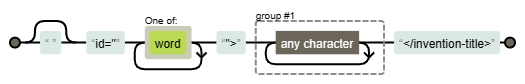

In [6]:
# claim unicode pattern
unicode_pattern = re.compile(r'&#[\w\d]+;')
# tag pattern use to remove unwanted tags
tag_pattern = re.compile(r'''<[\/\w\d!@#$%^&*\(\)\-_+=~\"\{\}\[\]|\\:;'\"\?,\.\s]+>''')


# title pattern
title_pattern = re.compile(r'(?<=\<invention-title) ?id=\"[\w]+\">(.+)\</invention-title\>')
# number of patent use as a key in dict
patent_count = 0
# loop throung patent
for patent in patent_split_match:
    patent_count += 1  # increment by 1 to use as a key 
    title_match = title_pattern.findall(patent)  # find title in each patent
    title_match[0] = re.sub(pattern= unicode_pattern, repl="", string=title_match[0])
    title_match[0] = re.sub(pattern= tag_pattern, repl="", string=title_match[0])
    
    
    patent_dict[patent_count].append(title_match[0]) # append to list in dict 

### Extract patent_kind

There are total 2 steps in the process of extracting patent_kind.
1. To identify the unique patent kind in all patents.
2. Extract the kind and then interpret them to comprehensible description. Note that the descriptions are from the given sample_output.csv.

**Identify the unique values of patent kinds**

In [7]:
# kind pattern
kind_pattern = re.compile(r'(?<=\<kind>)[A-Z][0-9](?=\<\/kind>)')
kind_set = set()   # use to check unique value of kind
for patent in patent_split_match:
    kind_match = kind_pattern.findall(patent)[0]  # only the first element refer to patent kind
    kind_set.add(kind_match) # add to set

# all unique kinds output
print(kind_set)

{'S1', 'B1', 'P3', 'B2'}


**Extract patent kind then interpret them.**

In [8]:
# Create a dictonary of kinds and its full description 
patent_kind_dict = {
                   'S1': 'Design Patent',
                   'P2': 'Plant Patent Grant (no published application) issued on or after January 2, 2001',
                   'P3': 'Plant Patent Grant (with a published application) issued on or after January 2, 2001',
                   'E1': 'Reissue Patent',
                   'B1': 'Utility Patent Grant (no published application) issued on or after January 2, 2001.',
                   'B2': 'Utility Patent Grant (with a published application) issued on or after January 2, 2001.'  
                   }

In [9]:
# number of patent use as a key in dict
patent_count = 0

# loop through each patent
for patent in patent_split_match:
    kind_match = kind_pattern.findall(patent)[0]  # only the first element refer to patent kind
    
    # matching a extracted kind to full description
    for key in patent_kind_dict:
        if kind_match == key: 
            patent_count += 1
            kind_match = patent_kind_dict[key]
            patent_dict[patent_count].append(kind_match) 

### Extract number_of_claims

The number_of_claims extracting process is relatively easy compare with others. we use the positive lookbehind and match the pattern after it.

In [10]:
# number of claims pattern
num_claims_pattern = re.compile(r'(?<=\<number\-of\-claims>)\d+')

# number of patent use as a key in dict
patent_count = 0

# loop thrgh each patent and append to dict
for patent in patent_split_match:
    patent_count += 1
    num_claims_match = num_claims_pattern.findall(patent)[0]
    patent_dict[patent_count].append(int(num_claims_match))

### Extract inventors

Since, one patent can be consisted of many inventors so we need to divide the content to 2 level, then extract data from each level.
- **level 1**, inventors level which contains many inventors.
- **level 2**, inventor level which contains the information of each inventor inculding first name and last name.
![inventors_level](inventors_level.png)


In [11]:
# lvel 1 is all inventors in each patent
inventors_list = []   # [[inventors in patent1], [inventors in patent2], ...]
inventors_pattern = re.compile(r'(?<=\<inventors\>)[\s\W\w]*(?=</inventors>)') # level1 patern

# last name pattern 
lname_pattern = re.compile(r'(?<=\<last-name>).+(?=\<\/last-name>)') 

# first name pattern
fname_pattern = re.compile(r'(?<=\<first-name>).+(?=\<\/first-name>)')

# number of patent use as a key in dict
patent_count = 0

# loop through each patent to extract inventors
for patent in patent_split_match:
    patent_count += 1  # increment by 1
    inventors_match = inventors_pattern.findall(patent)[0]   # find all inventors in each patent, lv1
    
    # In case there is no inventors append "NA"
    if len(inventors_match) == 0:
        patent_dict[patent_count].append("NA")
        continue
        
    fname_match = fname_pattern.findall(inventors_match) # find all first name of invetors in each patent, lv2
    lname_match = lname_pattern.findall(inventors_match) # find all last name of invetors in each patent, lv2
    full_name_list = [] # create a full name list 
    
    # loop throgh fname_match and lname_match to format full name
    for n in range(len(fname_match)):
        fname_match[n] = re.sub(pattern= unicode_pattern, repl='', string=fname_match[n])
        lname_match[n] = re.sub(pattern= unicode_pattern, repl='', string=lname_match[n])
        
        full_name = '{} {}'.format(fname_match[n], lname_match[n])  # formatting full name
        full_name_list.append(full_name)  # append formatted full name to full name list
    
    # crate required format (remove the '' between name)
    full_name_str = '[' + ','.join(full_name_list) + ']'
    
    
    patent_dict[patent_count].append(full_name_str) # add the inventors name to patent_dict

### Extract citation_application_count and citation_examiner_count


In this process, we do counting of the specific formats and append to the dictionary.

In [12]:
# cited by application pattern
ci_app_pattern = re.compile(r'<category>cited by applicant</category>')
# cited by examiner pattern
ci_ex_pattern = re.compile(r'<category>cited by examiner</category>')

# number of patent use as a key in dict
patent_count = 0

# loop through each patent
for patent in patent_split_match:
    patent_count += 1
    ci_app_match = ci_app_pattern.findall(patent)
    ci_ex_match = ci_ex_pattern.findall(patent)
    patent_dict[patent_count].append(int(len(ci_app_match))) # counting the lenght of matching, then trun it to int
    patent_dict[patent_count].append(int(len(ci_ex_match)))  # counting the lenght of matching, then trun it to int

### Extract claims_text

The extract claims_text process divided to 2 processes
1. Extracting the claims text from each patent.
2. Remove unwanted tag, for example \</claim-text>, \</claim-ref> ect. by function **re.sub()** to remove those tags.

In [13]:
claim_txt_pattern = re.compile(r'(?<=\<claim-text>).*')

# number of patent use as a key in dict
patent_count = 0

# loop through each patent
for patent in patent_split_match:
    patent_count += 1
    claim_txt_match = claim_txt_pattern.findall(patent) # matches
     
    # Check if there is no claim text match
    if len(claim_txt_match) == 0:
        claim_txt_match == 'NA'
        continue

    for n in range(len(claim_txt_match)):
        claim_txt_match[n] = re.sub(pattern=tag_pattern, repl='', string=claim_txt_match[n])
        claim_txt_match[n] = re.sub(pattern=unicode_pattern, repl='', string=claim_txt_match[n])
        
        
    claim_txt = '[' + ','.join(claim_txt_match) + ']'  # in the output file, some has no ',' between claims text
    patent_dict[patent_count].append(claim_txt)

### Extract abstract

In abstract process, we need to 
1. extract the abstract 
2. Clean unwanted tags by using the previous tags_pattern
3. Replace Unicode character codes, for example &#xb0, &#x2019 etc.

In [14]:
ab_pattern = re.compile(r'(?<=abstract id=\"abstract\">)\s.*')

# number of patent use as a key in dict
patent_count = 0
for patent in patent_split_match:
    patent_count += 1
    ab_match = ab_pattern.findall(patent)
    

    if len(ab_match) == 0:
        ab_match = 'NA'
    elif len(ab_match) > 0:
        # tag cleaning
        ab_match = re.sub(pattern= tag_pattern, repl='', string=ab_match[0])        
       
        ab_match = re.sub(pattern= unicode_pattern, repl= '', string= ab_match)
        ab_match = ab_match.strip()

    patent_dict[patent_count].append(ab_match)

-------------------------------------

<div class="alert alert-block alert-info">
    
### 4.4. Create dataframe<a class="anchor" name="Reg_Exp"></a>

After extracting all required information from patents, we need to create data frame by
1. create a Pandas dataframe use grant_id, patent_title, kind, number_of_claims, inventors, citations_application_count, citations_examiner_count, claims_text, and abstract headers.
2. use for loop to get data from patent_dict and append to the dataframe.
3. Next, set grant_id to be index

In [15]:
'''
The order of each feature in patent_dict
                    0          1             2     3 
{number_of_patent : [grant_id, patent_title, kind, number_of_claims, 
4          5                          6                         7            8
inventors, citations_applicant_count, citations_examiner_count, claims_text, abstract]}
''' 
# built the pandas dataframe
df = pd.DataFrame({'grant_id':[],
                  'patent_title':[],
                   'kind':[],
                   'number_of_claims':[],
                   'inventors':[],
                   'citations_applicant_count':[],
                   'citations_examiner_count':[],
                   'claims_text':[],
                   'abstract':[], 
                  })

# loop throgh the patent_dict and append patent_content to df
for n in range(len(patent_dict)):
    patent_content = {'grant_id':patent_dict[n+1][0],
                  'patent_title':patent_dict[n+1][1],
                   'kind':patent_dict[n+1][2],
                   'number_of_claims':patent_dict[n+1][3],
                   'inventors':patent_dict[n+1][4],
                   'citations_applicant_count':patent_dict[n+1][5],
                   'citations_examiner_count':patent_dict[n+1][6],
                   'claims_text':patent_dict[n+1][7],
                   'abstract':patent_dict[n+1][8]}

    df = df.append(patent_content, ignore_index= True)


C:\Users\non_n\AppData\Local\Temp\ipykernel_27756\3943321378.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(patent_content, ignore_index= True)
C:\Users\non_n\AppData\Local\Temp\ipykernel_27756\3943321378.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(patent_content, ignore_index= True)
C:\Users\non_n\AppData\Local\Temp\ipykernel_27756\3943321378.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(patent_content, ignore_index= True)
C:\Users\non_n\AppData\Local\Temp\ipykernel_27756\3943321378.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(patent_content, igno

C:\Users\non_n\AppData\Local\Temp\ipykernel_27756\3943321378.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(patent_content, ignore_index= True)
C:\Users\non_n\AppData\Local\Temp\ipykernel_27756\3943321378.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(patent_content, ignore_index= True)
C:\Users\non_n\AppData\Local\Temp\ipykernel_27756\3943321378.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(patent_content, ignore_index= True)
C:\Users\non_n\AppData\Local\Temp\ipykernel_27756\3943321378.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(patent_content, igno

In [16]:
# Change type of the following columns to int to reudce 2.0 to 2 when writing .csv
df['number_of_claims'] = df['number_of_claims'].astype(int)
df['citations_applicant_count'] = df['citations_applicant_count'].astype(int)
df['citations_examiner_count'] = df['citations_examiner_count'].astype(int)

In [17]:
# set grant_id as index
df = df.set_index('grant_id')

In [18]:
# check the data frame to see any missing values in the dataframe
df.isnull().sum()

patent_title                 0
kind                         0
number_of_claims             0
inventors                    0
citations_applicant_count    0
citations_examiner_count     0
claims_text                  0
abstract                     0
dtype: int64

-------------------------------------

<div class="alert alert-block alert-info">
    
### 4.5. Constructing json<a class="anchor" name="Reg_Exp"></a>

In this section, we try to construct the json format by using based function in python as the below image. 
![json_format](json_format.png)

In [19]:
json_str = '{'

for n in patent_dict:
    json_str = json_str + '"' + patent_dict[n][0] + '"' + ':' + '{' +\
    '"patent_title"' + ':' + f'"{patent_dict[n][1]}"' + ',' +\
    '"kind"' + ':' + f'"{patent_dict[n][2]}"' + ',' +\
    '"number_of_claims"' + ':' + f'"{patent_dict[n][3]}"' + ',' +\
    '"inventors"' + ':' + f'"{patent_dict[n][4]}"' + ',' +\
    '"citations_applicant_count"' + ':' + f'"{patent_dict[n][5]}"' + ',' +\
    '"citations_examiner_count"' + ':' + f'"{patent_dict[n][6]}"' + ',' +\
    '"claims_text"' + ':' + f'"{patent_dict[n][7]}"' + ',' +\
    '"abstract"' + ':' + f'''"{patent_dict[n][8]}"''' + '}' + ','
    

json_str = json_str[:-1] + '}'

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 5.  Writing to CSV/JSON File <a class="anchor" name="write"></a>

</div>

In [20]:
# write the csv file
df.to_csv('task1_33366829.csv')

In [21]:
with open('task1_33366829.json', 'w') as file:
    file.write(json_str)

In [22]:
df2 = pd.read_json('task1_33366829.json')

In [23]:
df2

,US10360848,US10362075,US10357394,US10362626,US10358026,US10357194,US10360040,US10357280,US10361133,US10358630,...,US10359345,US10361089,US10361389,US10361895,US10358318,US10357202,US10362285,US10357818,US10358571,USD0854624
patent_title,Pixel compensating circuit,Presenting content captured by a plurality of ...,Ostomy pouch replacement device,Method and apparatus for handling DRX (discont...,Automatic transmission for hybrid vehicle and ...,Catheter,"Apparatus, systems, and methods for providing ...",Navigating introducer for tissue access system,High-K metal gate and method for fabricating t...,Recombinant influenza vectors with tandem tran...,...,Method for preparing liquid-state dripping or ...,Plasma processing method,"Light-emitting element, light-emitting device,...",Systems and methods for hybrid multi-layer sig...,Predictive analytics to determine elevator pat...,System and method for non-intrusive health mon...,"Color night vision cameras, systems, and metho...",Reusable casting head device,Aqueous coating compositions including phenoli...,Quad ride-on toy
kind,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (no published application...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Utility Patent Grant (with a published applica...,Design Patent
number_of_claims,2,27,13,6,20,32,30,8,20,15,...,10,7,28,28,17,19,20,1,25,1
inventors,[Huannan Wang],[Benjamin Nowak],"[Liney Guidry,Theresa Johnson,Reed Johnson,Bru...",[Li-Chih Tseng],[Olivier Lecomte],"[Stephen Blatcher,Richard Harley Greenville Ow...","[David Moloney,Richard Richmond,David Donohoe,...","[Joseph L. Mark,Brian C. Dougherty]","[Ju-Li Huang,Chih-Long Chiang,Ying-Liang Chuan...","[Yoshihiro Kawaoka,Gabriele Neumann]",...,[Wei Ding],"[Kengo Kaneko,Jun Hirose]","[Satoshi Seo,Hiromi Seo,Tatsuyoshi Takahashi,T...",[Lan Hu],"[Emmanuel Barajas Gonzalez,Shaun E. Harrington...","[David Chong Cheung Hyen,Patrick H. Hayes]","[Michael Keesling,Bran Ferren,Adrian Kaehler,D...","[Hong Shao,Xinxiao Lu,Zhen Zhu]","[Anthony C. Youlton,Robert M. O'Brien,Mary Jo ...","[Bill Talios,John Bisges,David Castrucci]"
citations_applicant_count,3,12,4,17,11,48,145,51,15,322,...,7,1,141,3,20,23,16,9,59,0
citations_examiner_count,3,1,18,2,1,21,2,4,0,0,...,3,2,2,3,9,42,0,22,2,62
claims_text,"[1. A pixel compensating circuit, comprising: ...",[1. A master electronic device configured to c...,[1. An ostomy pouch replacement device compris...,[1. A method of a UE (User Equipment) handling...,[1. An automatic transmission for a hybrid hea...,[1. A vascular catheter for taking a plurality...,[1. A parallel processing device to access mem...,"[1. A surgical access system, comprising: an o...",[1. A method of forming a semiconductor device...,"[1. A method to prepare influenza virus, compr...",...,[1. A method for preparing a control sample of...,[1. A plasma processing method performed using...,"[1. A light-emitting element comprising:,a fir...",[1. A method for decomposition of a source sig...,[1. A method for determining an optimal path f...,[1. A hand-held controlling device for use in ...,"[1. An imaging apparatus, comprising:,at least...","[1. A reusable casting head device, comprising...","[1. A method of making a coating co

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 6. Summary <a class="anchor" name="summary"></a>

</div>

In summary, the assignment start by splitting patents to individual patent then extract needed information, kept them in the dictionary. Next create a pandas dataframe and json format from extracted values, then write both csv and json file.

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 7. References <a class="anchor" name="Ref"></a>

</div>



[1]<a class="anchor" name="ref-2"></a>How to find the data between two tag  https://betterprogramming.pub/demystifying-look-ahead-and-look-behind-in-regex-4a604f99fb8c, Accessed 10/04/2022.

## --------------------------------------------------------------------------------------------------------------------------